<a href="https://colab.research.google.com/github/normajacob12/REGRESSION-CAPSTONE-PROJECT/blob/main/ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Load the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/linear regression/energy.csv')

In [4]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
dataset.shape

(19735, 29)

In [ ]:
pd.isnull("dataset")

False

In [ ]:
dataset.duplicated().sum()

0

In [8]:
new_data=dataset.drop(['date','lights'],axis=1)


In [9]:
target_var='Appliances'


In [10]:
independent_variables = list(set(new_data.columns.tolist()) - {target_var})
print(independent_variables)


['RH_4', 'T1', 'T4', 'Press_mm_hg', 'rv1', 'RH_6', 'Windspeed', 'RH_9', 'T9', 'T8', 'RH_3', 'RH_out', 'RH_5', 'T3', 'T6', 'Visibility', 'T2', 'T5', 'RH_7', 'T7', 'T_out', 'RH_8', 'Tdewpoint', 'rv2', 'RH_1', 'RH_2']


In [11]:
#create data of independent variables
X=dataset[independent_variables].values
#create data of target variable
Y=dataset[target_var].values

In [12]:
target_df=pd.DataFrame(Y)
independent_df=pd.DataFrame(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b7f30450>]],
      dtype=object)

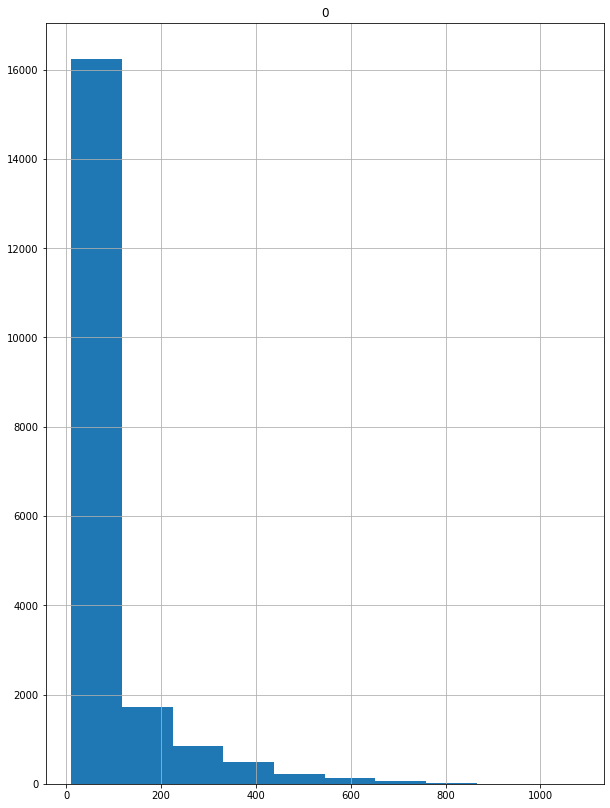

In [13]:
target_df.hist(bins=10,figsize=(10,14))

In [14]:
dataset[independent_variables]

,RH_4,T1,T4,Press_mm_hg,rv1,RH_6,Windspeed,RH_9,T9,T8,RH_3,RH_out,RH_5,T3,T6,Visibility,T2,T5,RH_7,T7,T_out,RH_8,Tdewpoint,rv2,RH_1,RH_2
0,45.566667,19.890000,19.000000,733.5,13.275433,84.256667,7.000000,45.5300,17.033333,18.2000,44.730000,92.000000,55.200000,19.790000,7.026667,63.000000,19.200000,17.166667,41.626667,17.200000,6.600000,48.900000,5.300000,13.275433,47.596667,44.790000
1,45.992500,19.890000,19.000000,733.6,18.606195,84.063333,6.666667,45.5600,17.066667,18.2000,44.790000,92.000000,55.200000,19.790000,6.833333,59.166667,19.200000,17.166667,41.560000,17.200000,6.483333,48.863333,5.200000,18.606195,46.693333,44.722500
2,45.890000,19.890000,18.926667,733.7,28.642668,83.156667,6.333333,45.5000,17.000000,18.2000,44.933333,92.000000,55.090000,19.790000,6.560000,55.333333,19.200000,17.166667,41.433333,17.200000,6.366667,48.730000,5.100000,28.642668,46.300000,44.626667
3,45.723333,19.890000,18.890000,733.8,45.410389,83.423333,6.000000,45.4000,17.000000,18.1000,45.000000,92.000000,55.090000,19.790000,6.433333,51.500000,19.200000,17.166667,41.290000,17.133333,6.250000,48.590000,5.000000,45.410389,46.066667,44.590000
4,45.530000,19.890000,18.890000,733.9,10.084097,84.893333,5.666667,45.4000,17.000000,18.1000,45.000000,92.000000,55.090000,19.790000,6.366667,47.666667,19.200000,17.200000,41.230000,17.200000,6.133333,48.590000,4.900000,10.084097,46.333333,44.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,45.590000,25.566667,24.700000,755.2,43.096812,1.000000,3.333333,46.7900,23.200000,24.7000,41.163333,55.666667,52.400000,27.200000,24.796667,23.666667,25.890000,23.200000,44.500000,24.500000,22.733333,50.074000,13.333333,43.096812,46.560000,42.025714
19731,45.590000,25.500000,24.700000,755.2,49.282940,1.000000,3.500000,46.7900,23.200000,24.7000,41.223333,56.000000,52.326667,27.133333,24.196667,24.500000,25.754000,23.230000,44.414286,24.557143,22.600000,49.790000,13.300000,49.282940,46.500000,42.080000
19732,45.730000,25.500000,24.700000,755.2,29.199117,1.000000,3.666667,46.7900,23.200000,24.7000,41.690000,56.333333,52.266667,27.050000,23.626667,25.333333,25.628571,23.230000,44.400000,24.540000,22.466667,49.660000,13.266667,29.199117,46.596667,42.768571
19733,45.790000,25.500000,24.700000,755.2,6.322784,1.000000,3.833333,46.8175,23.200000,24.6625,41.290000,56.666667,52.200000,26.890000,22.433333,26.166667,25.414000,23.200000,44.295714,24.500000,22.333333,49.518750,13.233333,6.322784,46.990000,43.036000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0b7e172d0>,
      dtype=object)

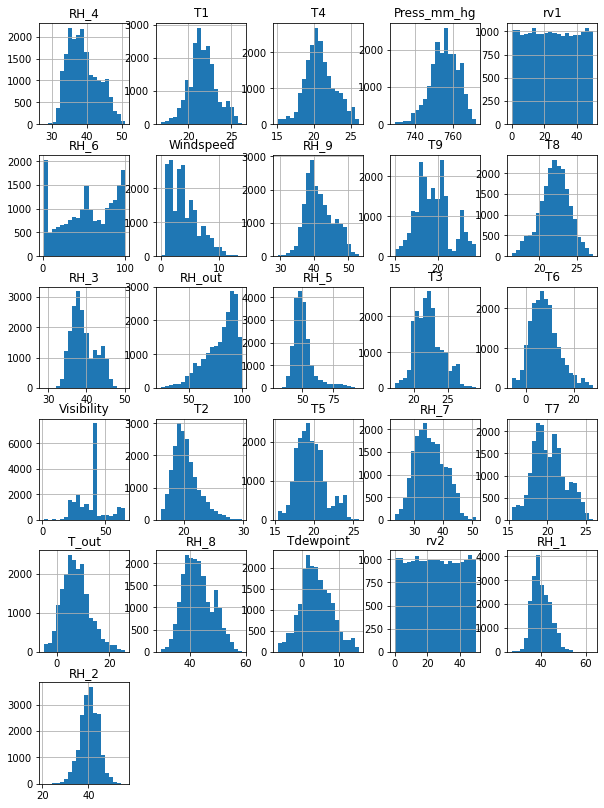

In [15]:
dataset[independent_variables].hist(bins=20,figsize=(10,14))

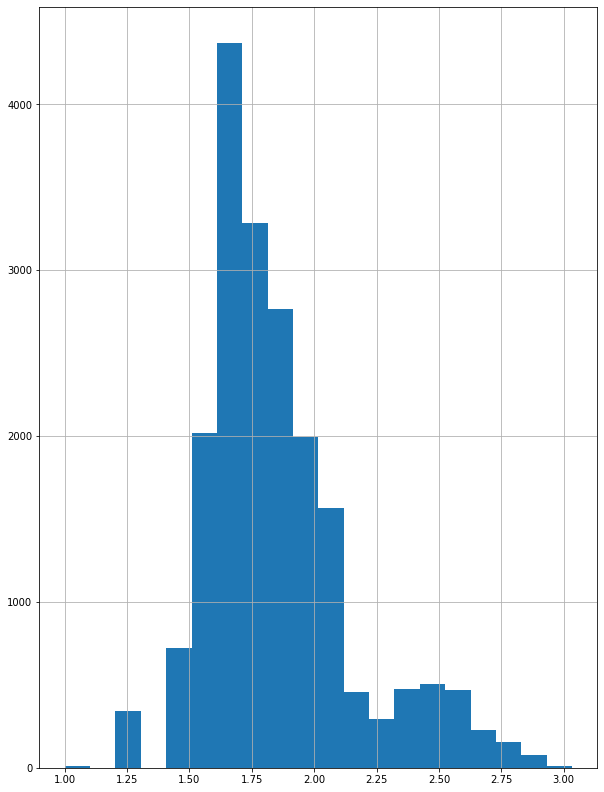

In [17]:
transformed_target=np.log10(dataset['Appliances'])
transformed_target.hist(bins=20,figsize=(10,14))
